Task 1 Merge 12 months

In [343]:
import pandas as pd
import os
df = pd.read_csv("C:\\programowanie\\python\\Jupyter_nauka\\Projekty\\4_Projekt_Guided_Sales\\All_sales\\Sales_April_2019.csv")
files = [file for file in os.listdir('C:\\programowanie\\python\\Jupyter_nauka\\Projekty\\4_Projekt_Guided_Sales\\All_sales')]
all_Months_Data = pd.DataFrame()
for file in files:
    
    df = pd.read_csv("C:\\programowanie\\python\\Jupyter_nauka\\Projekty\\4_Projekt_Guided_Sales\\All_sales\\"+file)
    all_Months_Data = pd.concat([all_Months_Data, df])
all_Months_Data.to_csv("ALL DATA.csv",index = False)
all_Months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Task 2 Clean data 
2a. Usuniecie wszystkich wierszy z NAN

In [344]:
nan_df = all_Months_Data[all_Months_Data.isna().any(axis=1)] # znalezlusmy linijki z watrtosciami NaN

all_Months_Data = all_Months_Data.dropna(how = 'all')
all_Months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


2.b Znajdz 'Or'

In [345]:
all_Months_Data = all_Months_Data[all_Months_Data['Order Date'].str[0:2]!='Or']

all_Months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Task 3 Add Month Column


In [346]:
all_Months_Data["Month"]=all_Months_Data['Order Date'].str[0:2]
all_Months_Data['Month'] = all_Months_Data['Month'].astype('int32')
all_Months_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Q1 What was the best month for Sale

In [347]:
all_Months_Data['Price Each'] = all_Months_Data['Price Each'].astype(float)
all_Months_Data['Quantity Ordered'] = all_Months_Data['Quantity Ordered'].astype(int)
all_Months_Data['Sales'] = all_Months_Data['Quantity Ordered'] * all_Months_Data['Price Each']



In [348]:
grp_Months = all_Months_Data.groupby('Month')['Sales'].sum().round(1)

grp_Months

Month
1     1822256.7
2     2202022.4
3     2807100.4
4     3390670.2
5     3152606.8
6     2577802.3
7     2647775.8
8     2244467.9
9     2097560.1
10    3736726.9
11    3199603.2
12    4613443.3
Name: Sales, dtype: float64

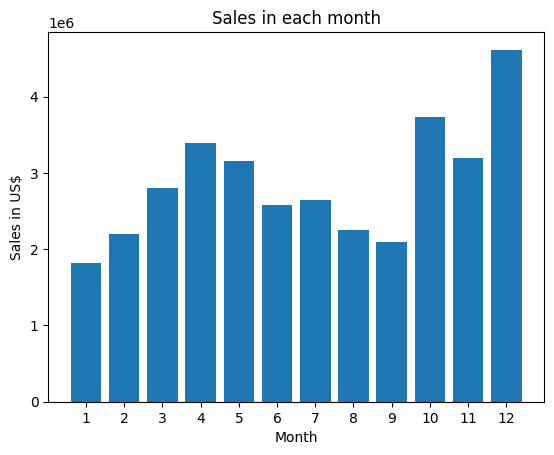

In [349]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,grp_Months)
plt.title("Sales in each month")
plt.ylabel("Sales in US$")
plt.xlabel("Month")

plt.xticks(months)
plt.show()

Q2 Biggest Sales by Product

In [350]:
grp_Product = all_Months_Data.groupby('Product')['Sales'].sum()
min_Ratio = grp_Product.idxmin()
min = grp_Product.min()
print("Weakest Sales has ",min_Ratio," it was equal to",min)
max_Ratio = grp_Product.idxmax()
max = grp_Product.max()
print("Best Sales has ",max_Ratio," it was equal to",max)
grp_Product

Weakest Sales has  AAA Batteries (4-pack)  it was equal to 92740.83
Best Sales has  Macbook Pro Laptop  it was equal to 8037600.0


Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64

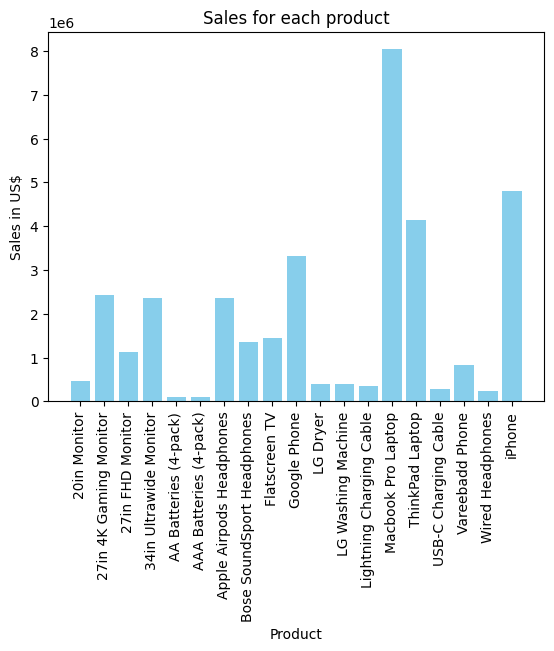

In [351]:

plt.bar(grp_Product.index, grp_Product,color = 'skyblue')
plt.title("Sales for each product")
plt.ylabel("Sales in US$")
plt.xlabel("Product")
plt.xticks(rotation = 90)

plt.show()

Q3. What city had the best Sales

City with the best sales is  San Francisco


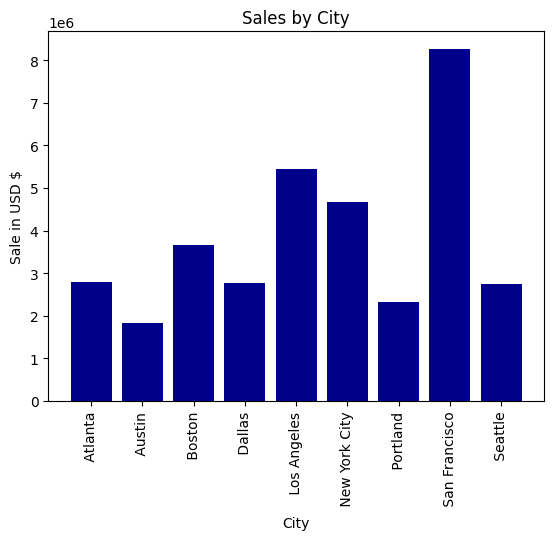

In [352]:
all_Months_Data ['city'] = all_Months_Data['Purchase Address'].apply(lambda x: x.split(',')[1] )# mozemy uzyc danej funkcji dla calej kolumny funckaj lambda x: x.split(',') rozdzielamy nam string na tablice 1D rozdzielona przecinkami
result = all_Months_Data.groupby('city')['Sales'].sum()
result
plt.bar(result.index,result,color = 'darkblue')
plt.xticks(rotation = 90)
plt.ylabel('Sale in USD $')
plt.xlabel('City')
plt.title('Sales by City')
max_sales_city = result.idxmax()
print('City with the best sales is', max_sales_city)

Q4 What time is best for dispaly advertisment

C:\Users\adria\AppData\Local\Temp\ipykernel_8024\682821390.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_Months_Data['Order Date'] = pd.to_datetime(all_Months_Data['Order Date']) # Zamiana na format czasowy


Hour that is most optimal for advertisment is 19


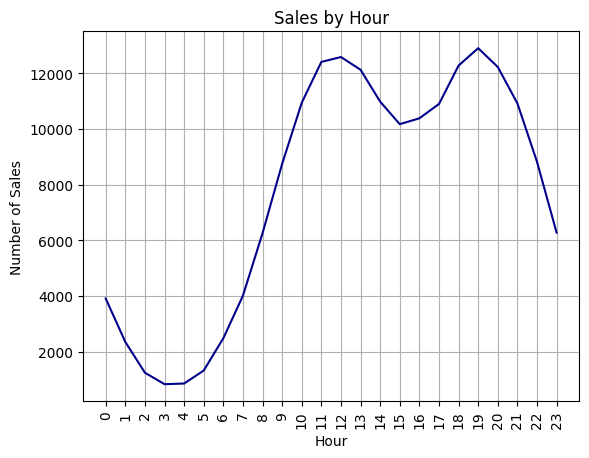

In [353]:
all_Months_Data['Order Date'] = pd.to_datetime(all_Months_Data['Order Date']) # Zamiana na format czasowy
all_Months_Data['Hour'] = all_Months_Data['Order Date'].dt.hour # Jak mamy format czasowy to łątwo nam wyciagnac z niego godzine wystarcz kolumna ktora nas interesuje i dt.hour
all_Months_Data
best_h = all_Months_Data.groupby('Hour')['Sales'].count()
best_h
plt.plot(best_h.index,best_h,color = 'darkblue')
plt.xticks(best_h.index, rotation = 90)
plt.ylabel('Number of Sales')
plt.xlabel('Hour')
plt.title('Sales by Hour')
plt.grid()
best_sales_h = best_h.idxmax()
print('Hour that is most optimal for advertisment is', best_sales_h)
plt.show()

Q5 What products are most often sold together

In [371]:


df = all_Months_Data[all_Months_Data['Order ID'].duplicated(keep = False)]
df ['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()



C:\Users\adria\AppData\Local\Temp\ipykernel_8024\2329424167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


AttributeError: 'DataFrame' object has no attribute 'len'